# **Installing Library**

In [ ]:
import warnings
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
from matplotlib import pyplot as plt

from pylab import rcParams

from sklearn.linear_model import LinearRegression

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
# from fbprophet import Prophet
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")

### **Loading Dataset**

In [ ]:
air_pollution = pd.read_csv('Air_Pollutions.csv')
air_pollution.dropna(inplace = True)
air_pollution.set_index('date', inplace = True)
air_pollution.head()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
date,,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [ ]:
air_pollution.describe()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,98.245080,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023,98.245080
std,76.807697,14.163508,11.552997,10.076053,41.373161,0.546072,0.993917,76.807697
min,3.166667,-33.333333,-14.458333,994.041667,1.412500,0.000000,0.000000,3.166667
25%,42.333333,-10.083333,1.541667,1007.916667,5.904167,0.000000,0.000000,42.333333
50%,79.166667,2.041667,13.916667,1016.208333,10.953750,0.000000,0.000000,79.166667
75%,131.166667,15.083333,23.166667,1024.541667,22.235000,0.000000,0.000000,131.166667
max,541.895833,26.208333,32.875000,1043.458333,463.187917,14.166667,17.583333,541.895833


In [ ]:
air_pollution_df = air_pollution[['pollution_today']]
air_pollution_df.head(7)

,pollution_today
date,
2010-01-02,145.958333
2010-01-03,78.833333
2010-01-04,31.333333
2010-01-05,42.458333
2010-01-06,56.416667
2010-01-07,69.000000
2010-01-08,176.208333


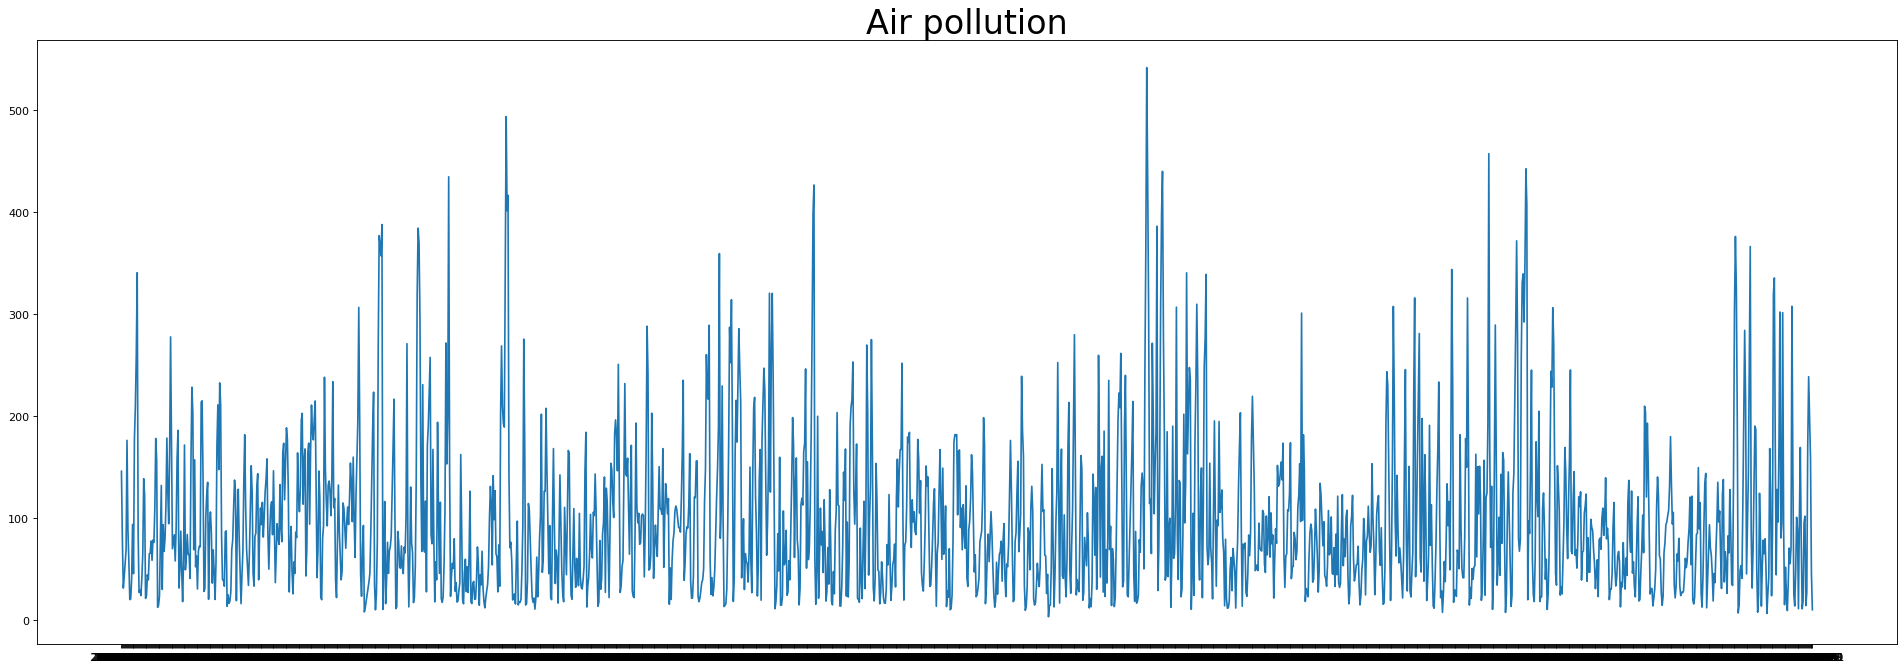

In [ ]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Air pollution', fontsize=30)

plt.plot(air_pollution_df.pollution_today)

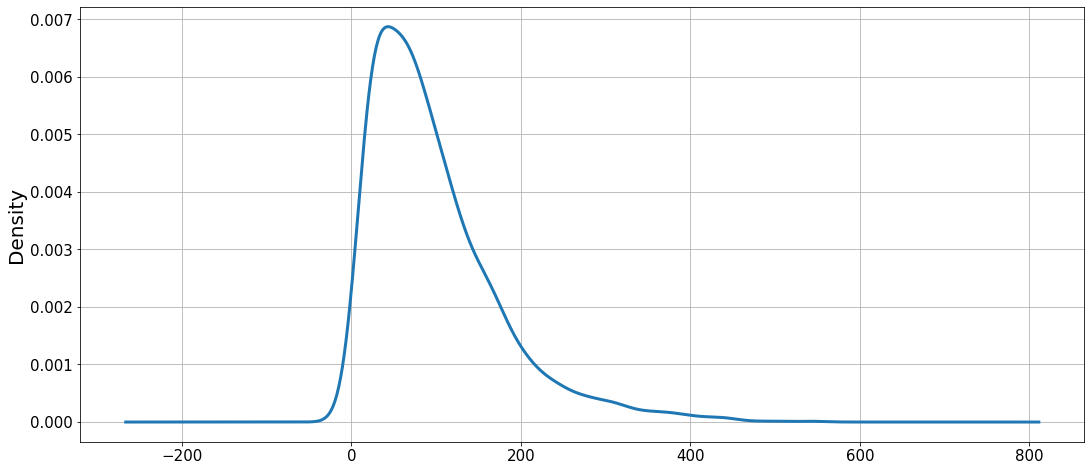

In [ ]:
# distribution of the pollution.
pollution_today = air_pollution_df.pollution_today

pollution_today.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

#### Checking whether Data is Stationarity or Non-Stationarity

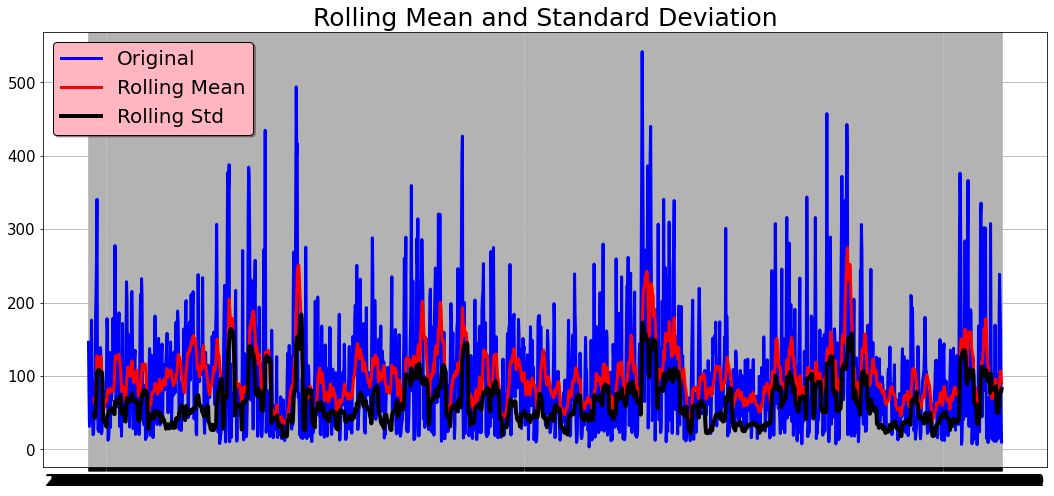

result of dickey fuller test
Test Statistics               -1.011672e+01
p-value                        9.680895e-18
No. of lags used               1.200000e+01
Number of observations used    1.812000e+03
critical value (1%)           -3.433964e+00
critical value (5%)           -2.863136e+00
critical value (10%)          -2.567620e+00
dtype: float64


In [ ]:
def test_stationarity(timeseries):

    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("result of dickey fuller test")

    adft = adfuller(timeseries, autolag = 'AIC')

    output = pd.Series(adft[0:4], index = ['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key, values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(pollution_today)

We can reject the Null hypothesis because the p-value is less than 0.05. Furthermore, the test statistics is less than critical values. As a result, the data is stationary.

<Figure size 432x288 with 0 Axes>

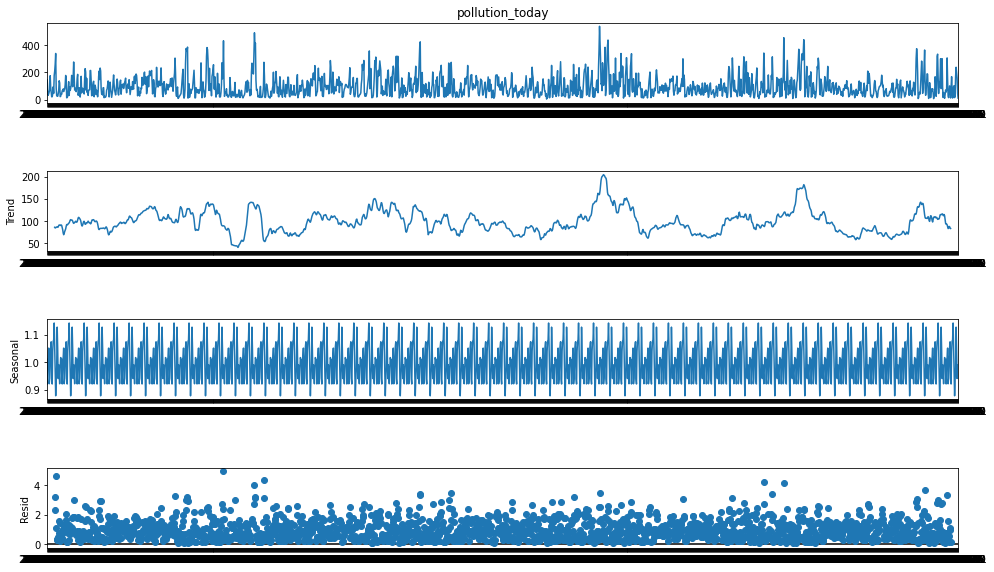

In [ ]:
result = seasonal_decompose(pollution_today, model= 'multiplicative', freq = 30)

fig = plt.figure()
fig = result.plot()  
fig.set_size_inches(16, 9)

<Figure size 432x288 with 0 Axes>

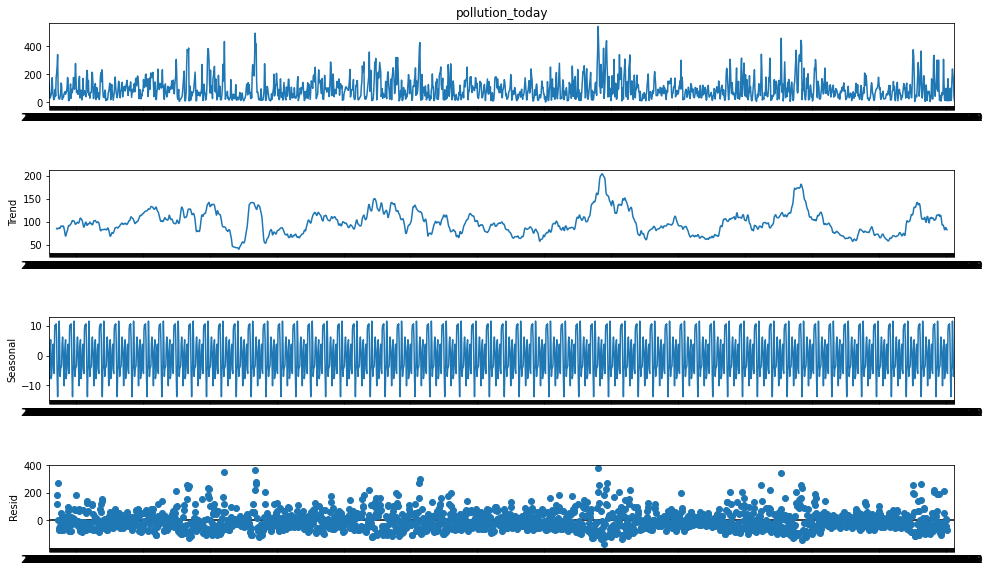

In [ ]:
result = seasonal_decompose(pollution_today, model= 'additive', freq = 30)

fig = plt.figure()
fig = result.plot()  
fig.set_size_inches(16, 9)

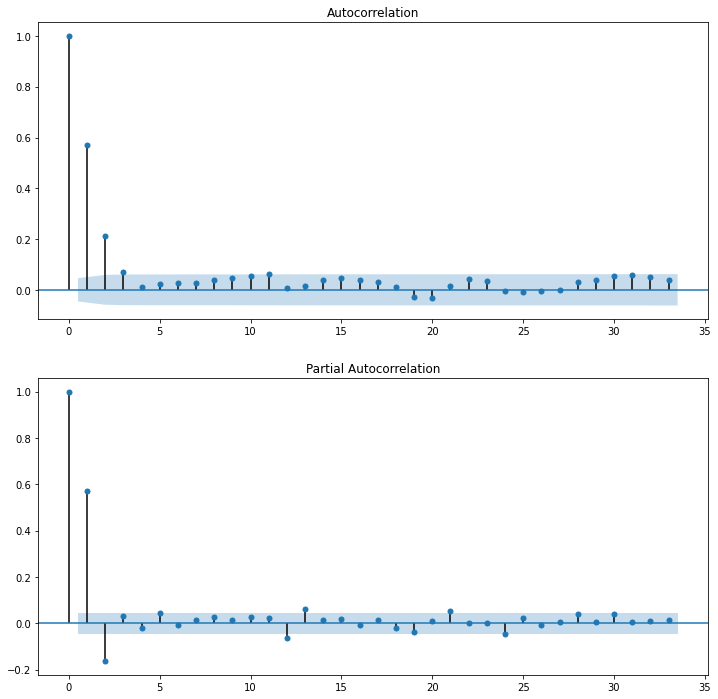

In [ ]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(211)

fig = plot_acf(pollution_today, ax = ax1)
ax2 = fig.add_subplot(212)

fig = plot_pacf(pollution_today, ax=ax2)

#### Implementing different Methods for time series forecasting:

There are various approaches for time series forecasting that we can utilise, and there is no distinct winner. The model you use should always be based on how your data looks and what you're attempting to accomplish.

In this notebook we will implement following models :

  a.Univariate Time Series Forecasting:

*   Simple Exponential Smoothing (SES)
* Holt Winter’s Exponential Smoothing (HWES)
* Autoregression (AR)
* Autoregressive Moving Average (ARMA)

B. Multivariate Time Series Forecasting

* Vector Autoregression (VAR)
* Vector Autoregression Moving-Average with Exogenous Regressors (VARMA)

split data into train and training set

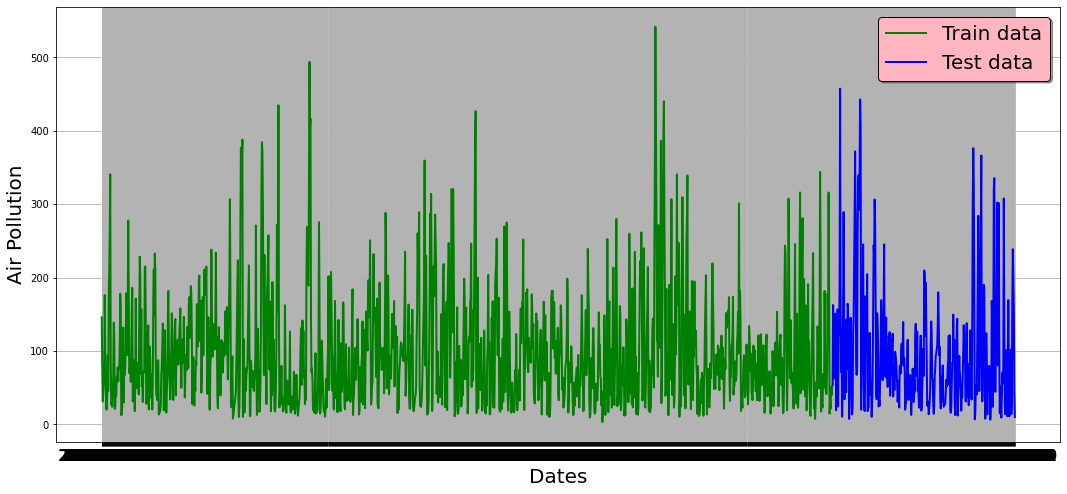

In [ ]:
#split data into train and training set
train_data=pollution_today[0:-365] # we are taking 2014 data as test data
test_data=pollution_today[-365:]

plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Air Pollution', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.plot(train_data, 'green', label='Train data', linewidth = 2)
plt.plot(test_data, 'blue', label='Test data', linewidth = 2)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

## **`1. Simple exponential smoothing (SES)`**

In [ ]:
history = [x for x in train_data]
predictions = list()

for t in range(len(test_data)):
  model = SimpleExpSmoothing(history)
  model_fit = model.fit()
  pred = model_fit.predict()
  predictions.append(pred)
  history.append(test_data[t])

ses = np.sqrt(mean_squared_error(test_data, predictions))
print("rmse of ses model:", ses)

rmse of ses model: 74.56967947076171


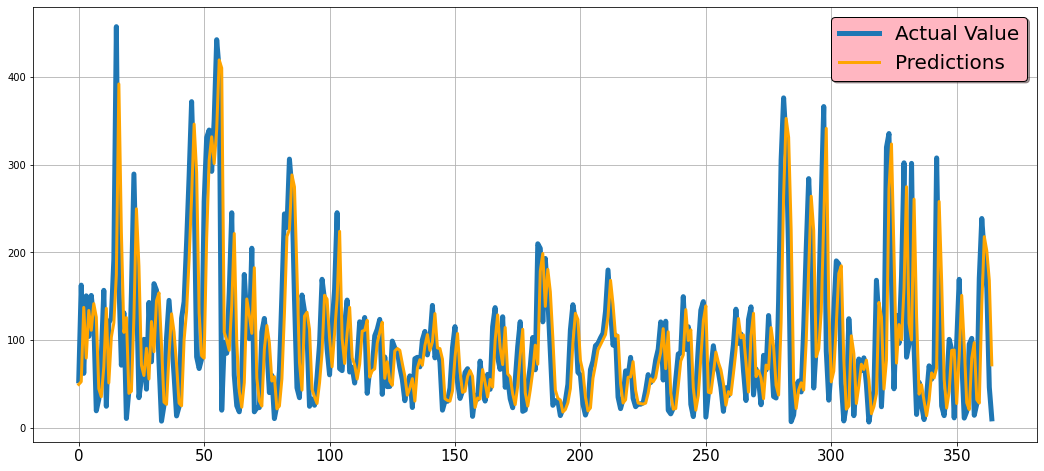

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'Actual Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions', linewidth = 3, color = 'orange')
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

## **2. Holt Winter’s Exponential Smoothing (HWES)**

In [ ]:
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
    model = ExponentialSmoothing(history)
    model_fit = model.fit()
    pred = model_fit.predict()
    predictions.append(pred)
    history.append(test_data[t])
hwes = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE of HWES Model:', hwes)

RMSE of HWES Model: 74.56967947076171


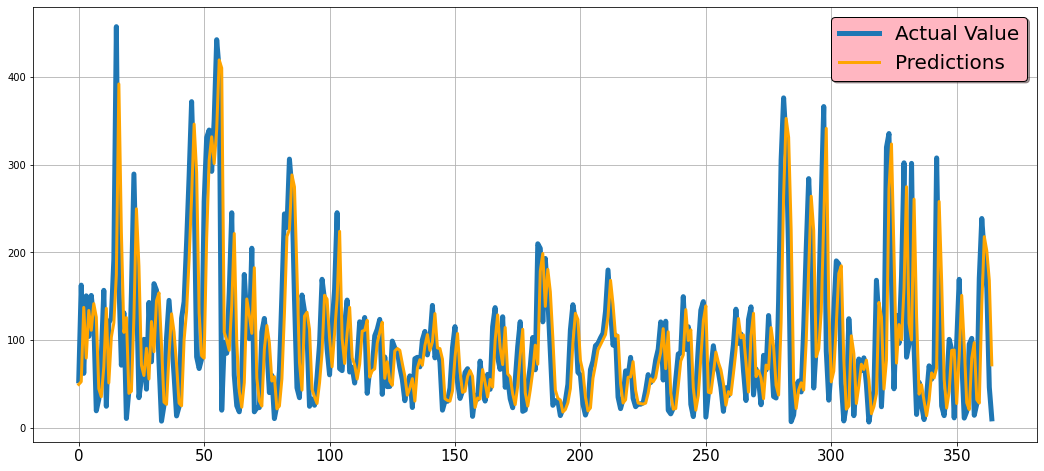

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'Actual Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions', linewidth = 3, color = 'orange')
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

## **3. Autoregression (AR)**

In [ ]:
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
    model = AR(history)
    model_fit = model.fit()
    pred = model_fit.predict(start=len(history), end=len(history), dynamic=False)
    predictions.append(pred)
    history.append(test_data[t])
ar = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE of AR Model:', ar)

RMSE of AR Model: 65.2434867460377


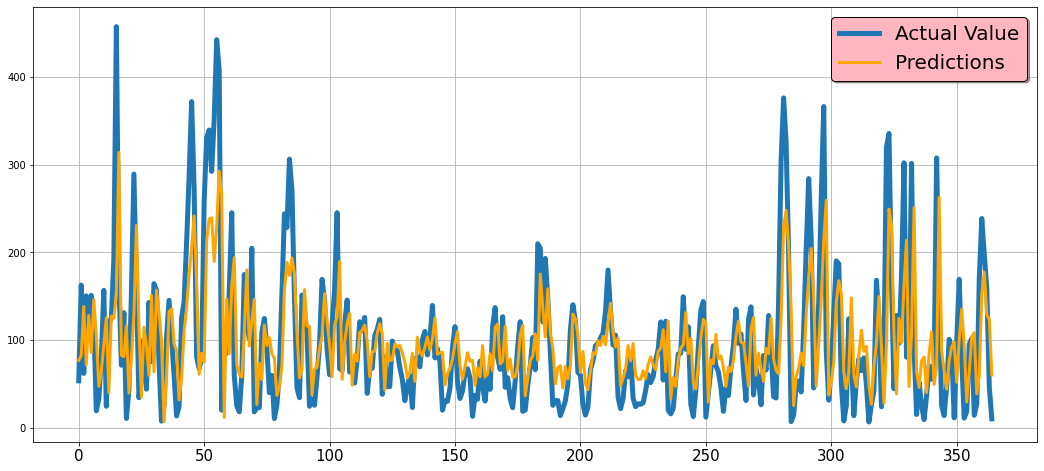

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'Actual Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions', linewidth = 3, color = 'orange')
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

## **4. Autoregressive Moving Average (ARMA)**

In [ ]:
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
    model = ARMA(history, order=(1, 3))
    model_fit = model.fit()
    pred = model_fit.predict(start=len(history), end=len(history), dynamic=False)
    predictions.append(pred)
    history.append(test_data[t])
ar = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE of AR Model:', ar)

RMSE of AR Model: 64.70104631893568


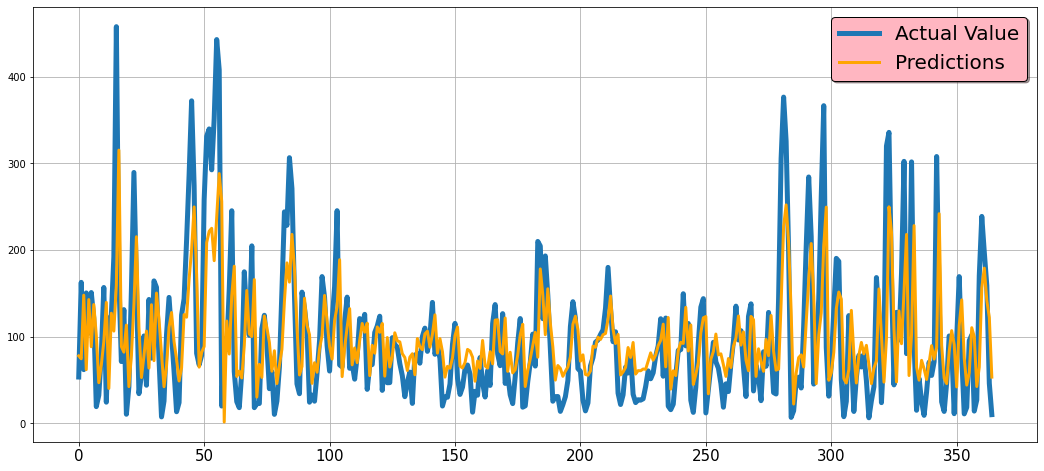

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'Actual Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions', linewidth = 3, color = 'orange')
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

## **5. Vector Autoregression (VAR)**

In [ ]:
# For multivariate time series forecasting, we are using two features pollution today and wind speed.
air_pollution = air_pollution[['pollution_today','wnd_spd']] 

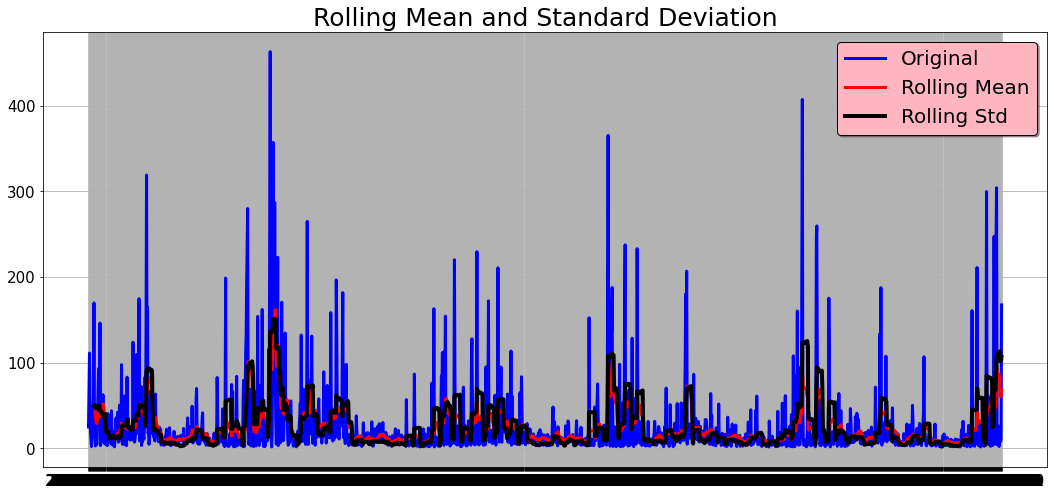

result of dickey fuller test
Test Statistics               -1.020183e+01
p-value                        5.942703e-18
No. of lags used               8.000000e+00
Number of observations used    1.816000e+03
critical value (1%)           -3.433956e+00
critical value (5%)           -2.863133e+00
critical value (10%)          -2.567618e+00
dtype: float64


In [ ]:
test_stationarity(air_pollution['wnd_spd']) 

In [ ]:
train = air_pollution[:-100]
test = air_pollution[-100:]

In [ ]:
history = train
predictions = list()
for t in range(len(test)):
    model = VAR(history)
    model_fit = model.fit(13)
    pred = model_fit.forecast(model_fit.y, steps = 1)
    predictions.append(pred)
    history = history.append(test.iloc[t:t+1,:])
prediction_1 = []
prediction_2 = []
for pred in predictions:
    prediction_1.append(pred[0][0])
    prediction_2.append(pred[0][1])
var_1 = np.sqrt(mean_squared_error(test['pollution_today'], prediction_1))
print('RMSE of VAR Model:', var_1)
var_2 = np.sqrt(mean_squared_error(test['wnd_spd'], prediction_2))
print('RMSE of VAR Model:', var_2)

RMSE of VAR Model: 77.78633367533583
RMSE of VAR Model: 58.01280733606399


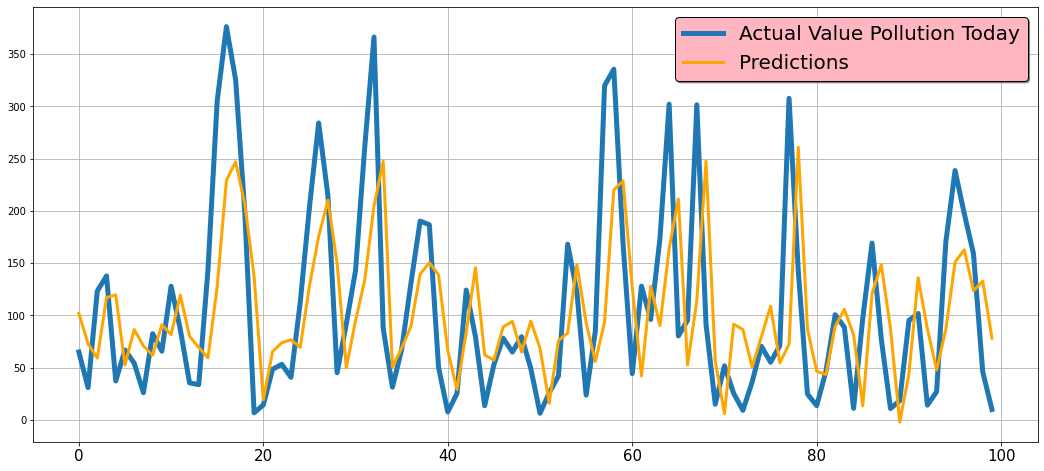

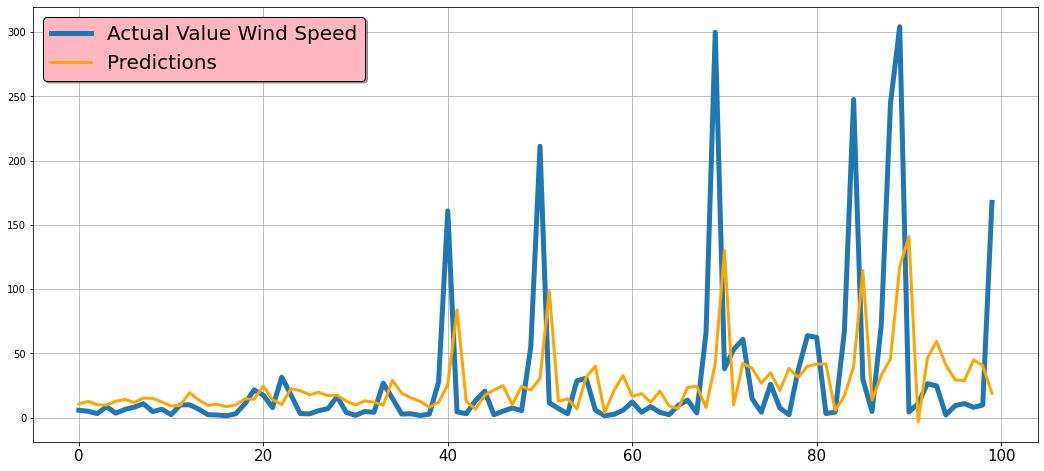

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test['pollution_today'])),test['pollution_today'], label = 'Actual Value Pollution Today', linewidth = 5)
plt.plot(range(len(prediction_1)), prediction_1, label = 'Predictions', linewidth = 3, color = 'orange')
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test['wnd_spd'])),test['wnd_spd'], label = 'Actual Value Wind Speed', linewidth = 5)
plt.plot(range(len(prediction_2)), prediction_2, label = 'Predictions', linewidth = 3, color = 'orange')
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

## **6. Vector Autoregression Moving-Average with Exogenous Regressors (VARMA)**

In [ ]:
train = air_pollution[:-30]
test = air_pollution[-30:]
history = train
predictions = list()
for t in range(len(test)):
    model = VARMAX(history, order = (2,1))
    model_fit = model.fit()
    pred = model_fit.forecast(steps = 1)
    predictions.append(pred)
    history = history.append(test.iloc[t:t+1,:])
prediction_1 = []
prediction_2 = []
for pred in predictions:
    prediction_1.append(pred['pollution_today'][0])
    prediction_2.append(pred['wnd_spd'][0])
varma_1 = np.sqrt(mean_squared_error(test['pollution_today'], prediction_1))
print('RMSE of VARMA Model:', varma_1)
varma_2 = np.sqrt(mean_squared_error(test['wnd_spd'], prediction_2))
print('RMSE of VARMA Model:', varma_2)

RMSE of VARMA Model: 65.83928197497887
RMSE of VARMA Model: 78.87024182949537


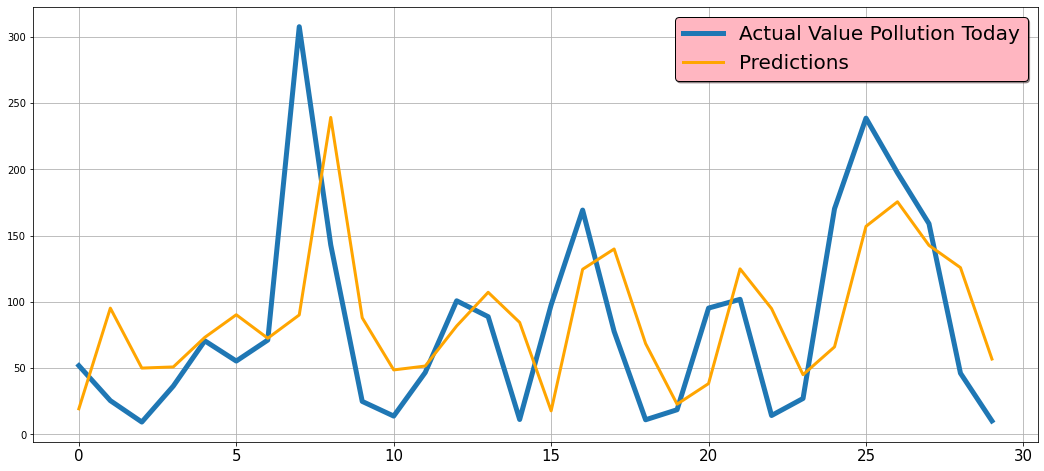

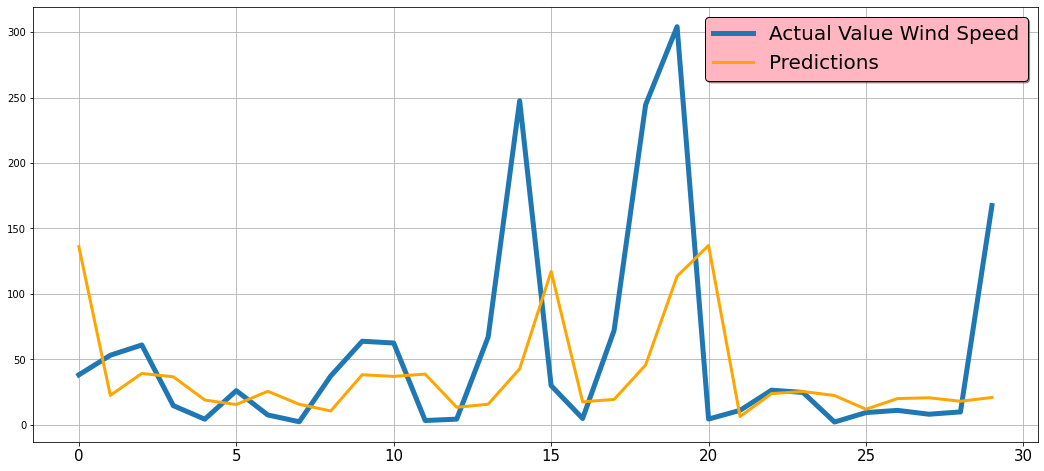

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test['pollution_today'])),test['pollution_today'], label = 'Actual Value Pollution Today', linewidth = 5)
plt.plot(range(len(prediction_1)), prediction_1, label = 'Predictions', linewidth = 3, color = 'orange')
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test['wnd_spd'])),test['wnd_spd'], label = 'Actual Value Wind Speed', linewidth = 5)
plt.plot(range(len(prediction_2)), prediction_2, label = 'Predictions', linewidth = 3, color = 'orange')
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

## **7. Arima**


In [ ]:
    
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math



In [ ]:
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
  model = ARIMA(history, order=(1, 0, 1))
  model_fit = model.fit()
  pred = model_fit.predict(start=len(history), end=len(history), dynamic=False)
  predictions.append(pred)
  history.append(test_data[t])
ar = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE of AR Model:', ar)

RMSE of AR Model: 64.78427124902842


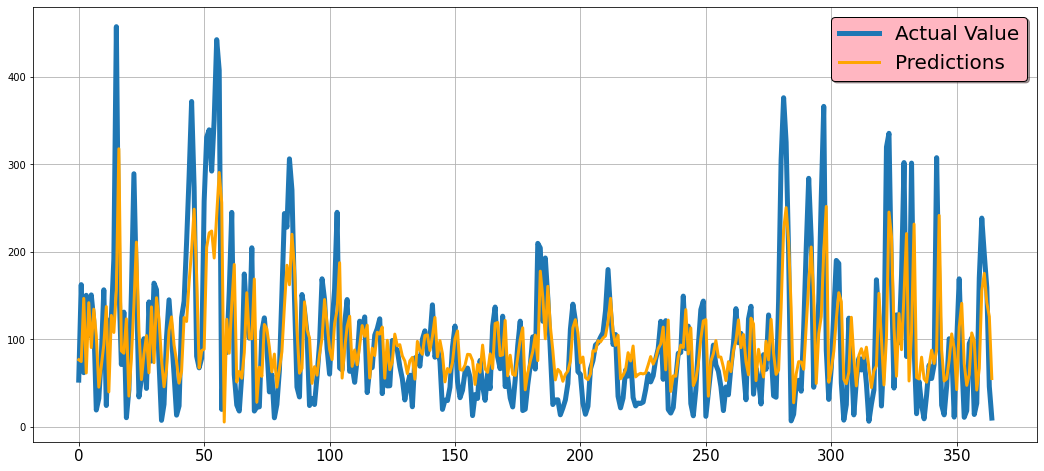

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'Actual Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions', linewidth = 3, color = 'orange')
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [ ]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
  model = ARIMA(history, order=(1, 0, 1))
  model_fit = model.fit()
  pred = model_fit.predict(start=len(history), end=len(history), dynamic=False)
  fc, se, conf = model_fit.forecast(alpha = 0.05)
  predictions.append(pred)
  
  conf_list.append(conf)
  history.append(test_data[t])
ar = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE of AR Model:', ar)

RMSE of AR Model: 64.78427124902842


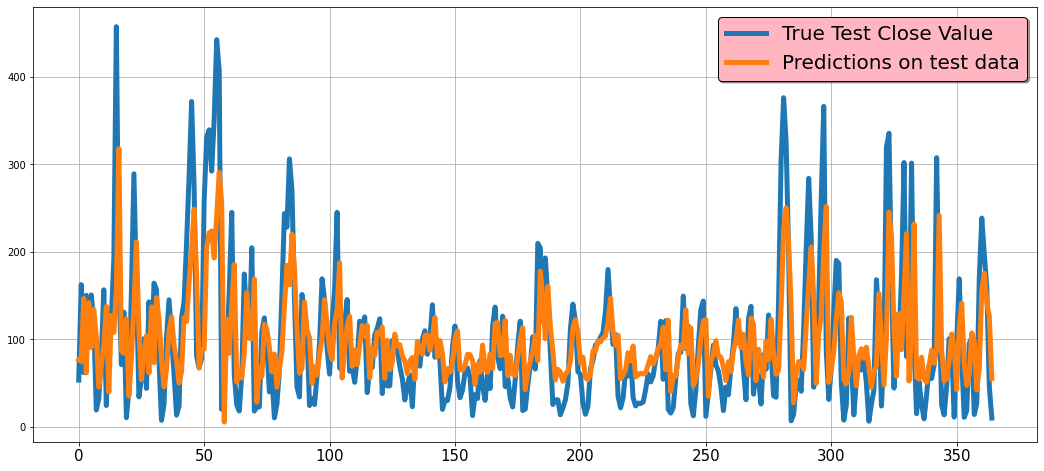

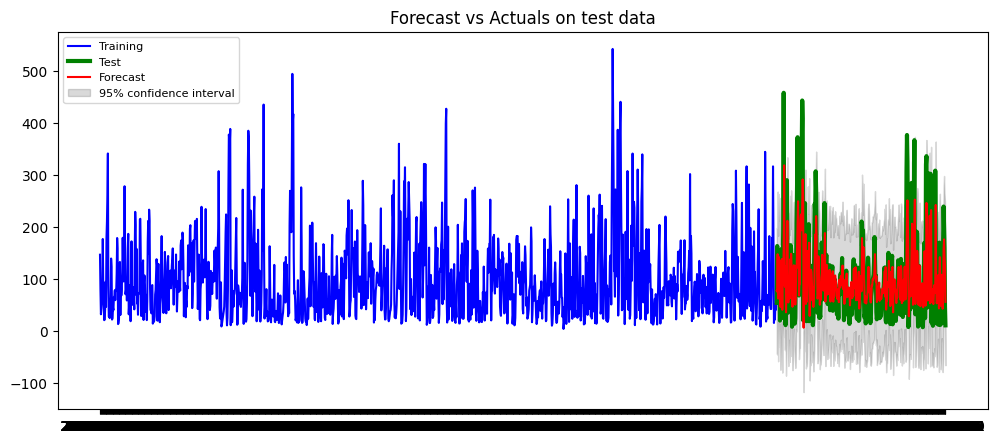

In [ ]:

plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

# Make as pandas series
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0][0])
    upper_series.append(i[0][1])
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Forecasting for next 60 days

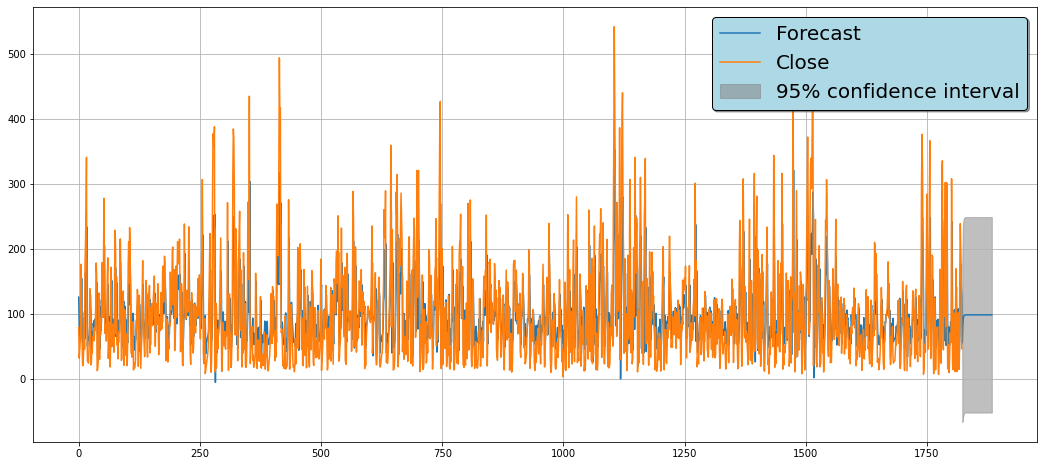

In [ ]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
model_fit.plot_predict(start=1, end=len(pollution_today)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()


## **8. Sarima**

In [ ]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 73.67348230358725


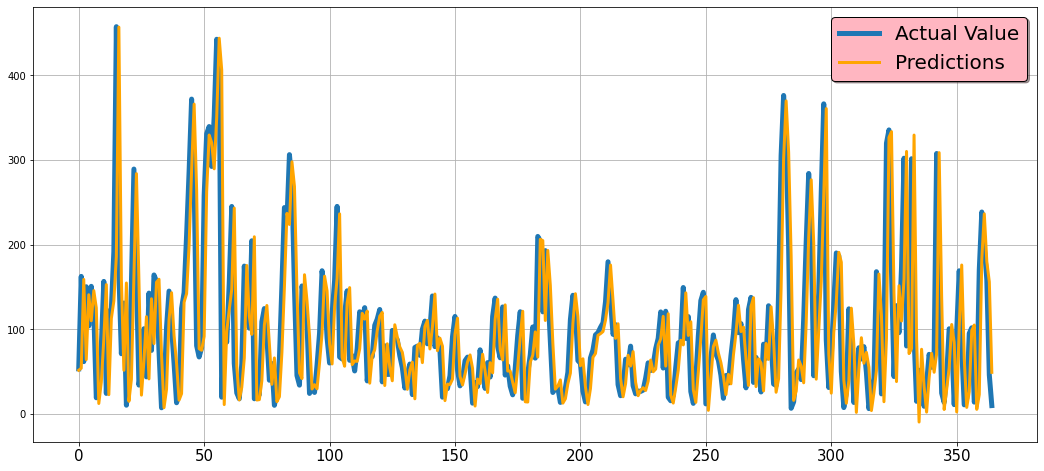

In [ ]:
# plt.figure(figsize=(18,8))
# plt.title('Forecast vs Actual', fontsize = 25)
# plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
# plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
# plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'Actual Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions', linewidth = 3, color = 'orange')
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dropout, Dense, SimpleRNN, GRU, MaxPooling1D, Flatten, Bidirectional, Convolution1D, RepeatVector, TimeDistributed
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import datetime
from keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
tf.random.set_seed(1234)

In [ ]:
stock = pd.read_csv('Air_Pollutions.csv')

In [ ]:
stock.head()

,date,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
0,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
1,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
3,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
4,2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [ ]:
stock = stock[['pollution_today']]

In [ ]:
stock_train = stock[0:-365]
stock_test = stock[-365:]


In [ ]:
stock_train

,pollution_today
0,145.958333
1,78.833333
2,31.333333
3,42.458333
4,56.416667
...,...
1455,31.916667
1456,21.125000
1457,50.520833
1458,39.833333


In [ ]:
scaler = StandardScaler()
stock_train['pollution_today'] = scaler.fit_transform(stock_train)
stock_test['pollution_today'] = scaler.transform(stock_test)

In [ ]:
stock_train['pollution_today']

0       0.630169
1      -0.257749
2      -0.886070
3      -0.738911
4      -0.554272
          ...   
1455   -0.878354
1456   -1.021104
1457   -0.632261
1458   -0.773634
1459   -0.614900
Name: pollution_today, Length: 1460, dtype: float64

In [ ]:
window_size = 60
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(window_size, len(stock_train)):
    X_train.append(stock_train.iloc[i-window_size:i].values) 
    y_train.append(stock_train.iloc[i, -1]) # consider Close as target
# Change them to numpy array
X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)

In [ ]:
print('Orignial length of train data : ', len(stock_train))
print('length of train data after windowing : ', len(X_train))

Orignial length of train data :  1460
length of train data after windowing :  1400


In [ ]:
X_train.shape

(1400, 60, 1)

In [ ]:
# Preparing Test dataset


# Concatenate train data to test data
dataset_total = np.concatenate((stock_train, stock_test), axis = 0)
# Split test data and last window-size of train data
inputs = dataset_total[len(dataset_total) - len(stock_test) - window_size:]
# Do the same thing for test data
X_test = []
y_test = []
for i in range(window_size, window_size+len(stock_test)):
    X_test.append(inputs[i-window_size:i, :]) 
    y_test.append(inputs[i, -1]) # consider Close as target
# Change them to numpy array
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1, 1)

## **9. Gated Recurrent Unit (GRU)**

In [ ]:
model_1 = Sequential()
model_1.add(GRU(units=256, input_shape = (X_train.shape[1], X_train.shape[2])))
model_1.add(Dropout(0.5))
model_1.add(Dense(units=10))
model_1.add(Dense(units=1))
adamopt = Adam(lr=0.001)
model_1.compile(optimizer = adamopt, loss = 'mse')
earlystop = EarlyStopping(monitor = 'loss',
                          min_delta = 0,
                          patience = 5,
                          restore_best_weights = True)

model_1_history = model_1.fit(X_train, y_train, epochs = 100, callbacks = earlystop)


Epoch 1/100
44/44 [==============================] - 10s 162ms/step - loss: 0.8051
Epoch 2/100
44/44 [==============================] - 6s 139ms/step - loss: 0.6984
Epoch 3/100
44/44 [==============================] - 7s 159ms/step - loss: 0.6886
Epoch 4/100
44/44 [==============================] - 6s 140ms/step - loss: 0.6847
Epoch 5/100
44/44 [==============================] - 7s 161ms/step - loss: 0.6897
Epoch 6/100
44/44 [==============================] - 6s 147ms/step - loss: 0.6892
Epoch 7/100
44/44 [==============================] - 7s 153ms/step - loss: 0.6867
Epoch 8/100
44/44 [==============================] - 7s 160ms/step - loss: 0.6866
Epoch 9/100
44/44 [==============================] - 6s 141ms/step - loss: 0.6748
Epoch 10/100
44/44 [==============================] - 7s 160ms/step - loss: 0.6831
Epoch 11/100
44/44 [==============================] - 6s 138ms/step - loss: 0.6754
Epoch 12/100
44/44 [==============================] - 7s 158ms/step - loss: 0.6719
Epoch 13/100

12/12 [==============================] - 1s 42ms/step
RMSE : 0.8531745053688621


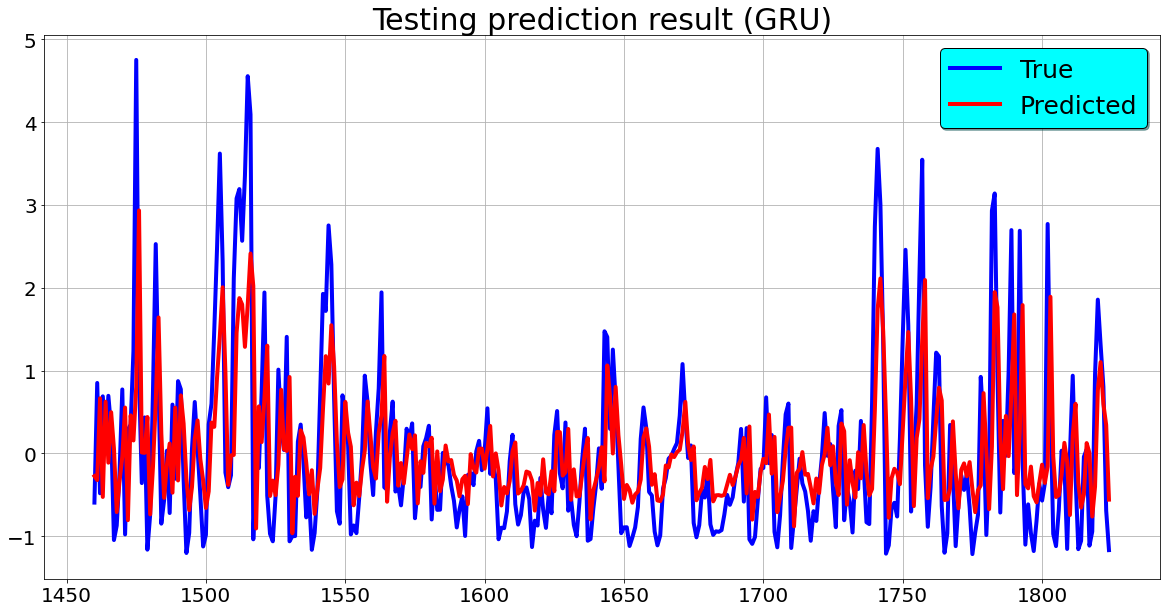

12/12 [==============================] - 1s 47ms/step
RMSE : 0.8531745053688621


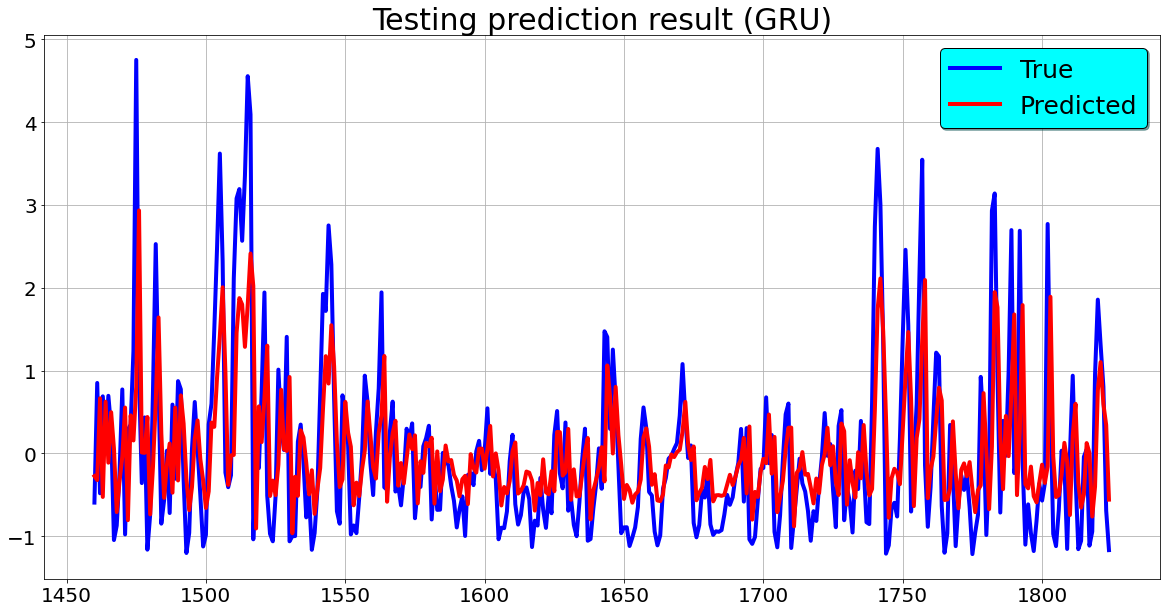

In [ ]:
test_predict_1 = model_1.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(y_test, test_predict_1)))

plt.figure(figsize = (20,10))
plt.grid(b=True, which='major', axis='both')
plt.title('Testing prediction result (GRU)', fontsize = 30)
plt.plot(stock_test.index, y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(stock_test.index, test_predict_1,linewidth = 4,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

## **10. Simple RNN**

In [ ]:
model_2 = Sequential()
model_2.add(SimpleRNN(units=128, input_shape = (X_train.shape[1], X_train.shape[2])))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=10))
model_2.add(Dense(units=1))
adamopt = Adam(lr=0.001)
model_2.compile(optimizer = adamopt, loss = 'mse')
model_2_history = model_2.fit(X_train, y_train, epochs = 100, batch_size = 100, callbacks = earlystop)

Epoch 1/100
14/14 [==============================] - 2s 42ms/step - loss: 0.9191
Epoch 2/100
14/14 [==============================] - 1s 46ms/step - loss: 0.7487
Epoch 3/100
14/14 [==============================] - 1s 41ms/step - loss: 0.6929
Epoch 4/100
14/14 [==============================] - 1s 42ms/step - loss: 0.6866
Epoch 5/100
14/14 [==============================] - 1s 45ms/step - loss: 0.6887
Epoch 6/100
14/14 [==============================] - 1s 44ms/step - loss: 0.6817
Epoch 7/100
14/14 [==============================] - 1s 43ms/step - loss: 0.6823
Epoch 8/100
14/14 [==============================] - 1s 48ms/step - loss: 0.6828
Epoch 9/100
14/14 [==============================] - 1s 46ms/step - loss: 0.6853
Epoch 10/100
14/14 [==============================] - 1s 74ms/step - loss: 0.6701
Epoch 11/100
14/14 [==============================] - 1s 87ms/step - loss: 0.6620
Epoch 12/100
14/14 [==============================] - 1s 87ms/step - loss: 0.6628
Epoch 13/100
14/14 [=====

12/12 [==============================] - 0s 8ms/step
RMSE : 1.1660067721928722


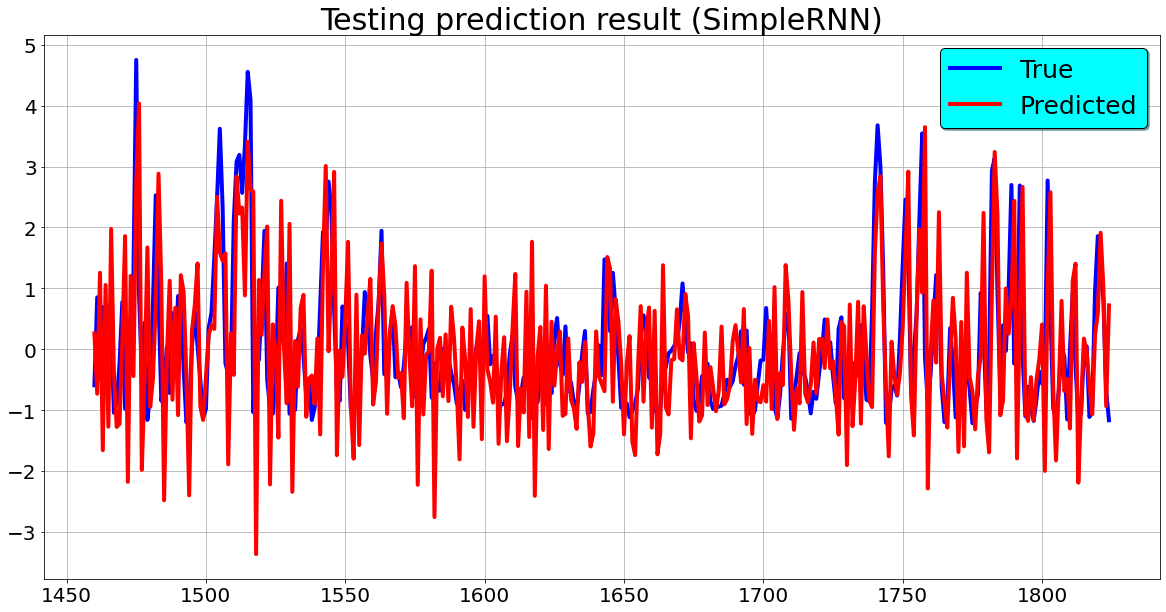

In [ ]:
test_predict_2 = model_2.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(y_test, test_predict_2)))

plt.figure(figsize = (20,10))
plt.grid(b=True, which='major', axis='both')
plt.title('Testing prediction result (SimpleRNN)', fontsize = 30)
plt.plot(stock_test.index, y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(stock_test.index, test_predict_2, linewidth = 4,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

## **11. LSTM**

In [ ]:
model_3 = Sequential()
model_3.add(LSTM(units=256, input_shape = (X_train.shape[1], X_train.shape[2])))
model_3.add(Dropout(0.2))
model_3.add(Dense(units=10))
model_3.add(Dense(units=1))
adamopt = Adam(lr=0.001)
model_3.compile(optimizer = adamopt, loss = 'mse')
model_3_history = model_3.fit(X_train, y_train, epochs = 100, batch_size = 100,callbacks = earlystop)

Epoch 1/100
14/14 [==============================] - 13s 496ms/step - loss: 0.9437
Epoch 2/100
14/14 [==============================] - 6s 433ms/step - loss: 0.8097
Epoch 3/100
14/14 [==============================] - 5s 324ms/step - loss: 0.7304
Epoch 4/100
14/14 [==============================] - 6s 444ms/step - loss: 0.6953
Epoch 5/100
14/14 [==============================] - 5s 338ms/step - loss: 0.6855
Epoch 6/100
14/14 [==============================] - 5s 327ms/step - loss: 0.6737
Epoch 7/100
14/14 [==============================] - 6s 448ms/step - loss: 0.6739
Epoch 8/100
14/14 [==============================] - 5s 332ms/step - loss: 0.6682
Epoch 9/100
14/14 [==============================] - 5s 334ms/step - loss: 0.6697
Epoch 10/100
14/14 [==============================] - 6s 447ms/step - loss: 0.6692
Epoch 11/100
14/14 [==============================] - 6s 410ms/step - loss: 0.6638
Epoch 12/100
14/14 [==============================] - 6s 443ms/step - loss: 0.6642
Epoch 13/100

12/12 [==============================] - 1s 58ms/step
RMSE : 0.856647971294008


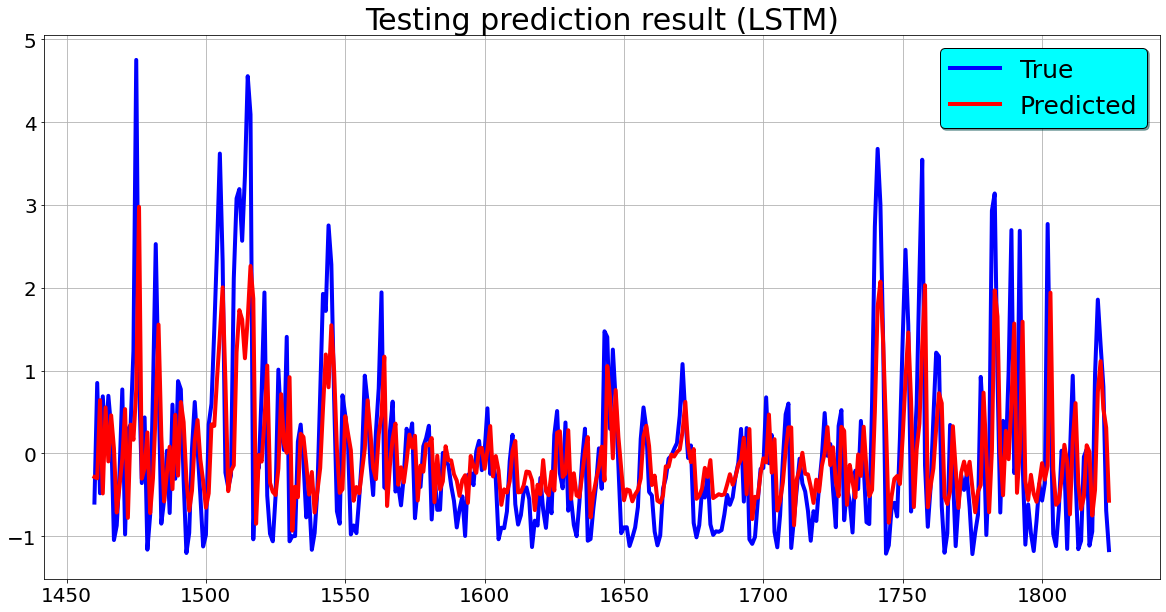

In [ ]:
test_predict_3=model_3.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(y_test, test_predict_3)))

plt.figure(figsize = (20,10))
plt.grid(b=True, which='major', axis='both')
plt.title('Testing prediction result (LSTM)', fontsize = 30)
plt.plot(stock_test.index, y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(stock_test.index, test_predict_3, linewidth = 4, color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

## **12. Bidirectional LSTM**


In [ ]:
model_4 = Sequential()
model_4.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train[1,:].shape))))
model_4.add(Dropout(0.2))
model_4.add(Dense(1))
adamopt = Adam(lr=0.001)
model_4.compile(optimizer = adamopt, loss = 'mse')
model_4.fit(X_train, y_train, epochs = 100, batch_size = 100,callbacks = earlystop)

Epoch 1/100
14/14 [==============================] - 5s 205ms/step - loss: 0.9763
Epoch 2/100
14/14 [==============================] - 3s 229ms/step - loss: 0.9053
Epoch 3/100
14/14 [==============================] - 4s 311ms/step - loss: 0.8730
Epoch 4/100
14/14 [==============================] - 3s 205ms/step - loss: 0.8593
Epoch 5/100
14/14 [==============================] - 3s 205ms/step - loss: 1.1139
Epoch 6/100
14/14 [==============================] - 4s 302ms/step - loss: 111.7192
Epoch 7/100
14/14 [==============================] - 4s 292ms/step - loss: 0.8983
Epoch 8/100
14/14 [==============================] - 3s 200ms/step - loss: 0.9021
Epoch 9/100
14/14 [==============================] - 3s 203ms/step - loss: 0.8974


12/12 [==============================] - 1s 42ms/step
RMSE : 0.9800594080761353


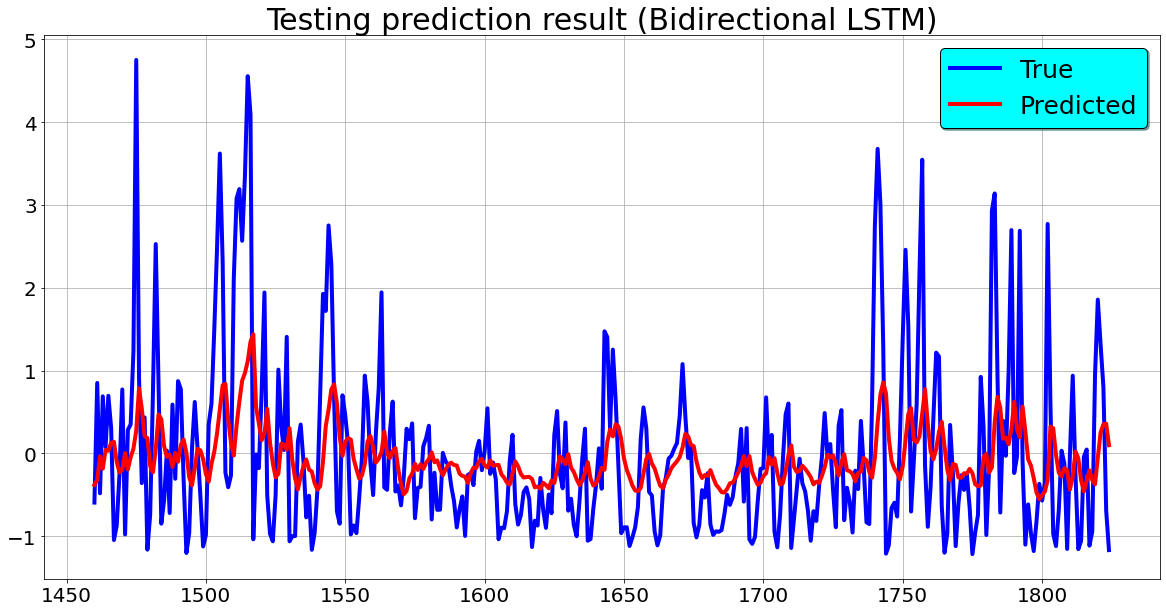

In [ ]:
test_predict_4 = model_4.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(y_test, test_predict_4)))

plt.figure(figsize = (20,10))
plt.grid(b=True, which='major', axis='both')
plt.title('Testing prediction result (Bidirectional LSTM)', fontsize = 30)
plt.plot(stock_test.index, y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(stock_test.index, test_predict_4, linewidth = 4,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

## **13. CNN-LSTM Encoder-Decoder**

In [ ]:
model_5 = Sequential()
model_5.add(Convolution1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train[1,:].shape)))
model_5.add(Convolution1D(filters=256, kernel_size=3, activation='relu'))
model_5.add(MaxPooling1D(pool_size=2))
model_5.add(Flatten())
model_5.add(RepeatVector(y_train.shape[1]))
model_5.add(LSTM(128, activation='relu', return_sequences=True))
model_5.add(TimeDistributed(Dense(100, activation='relu')))
model_5.add(TimeDistributed(Dense(1)))
model_5.compile(loss='mse', optimizer='adam')
model_5.fit(X_train, y_train, epochs = 100, batch_size = 100,callbacks = earlystop)

12/12 [==============================] - 1s 23ms/step
RMSE : 1.0714110270307267


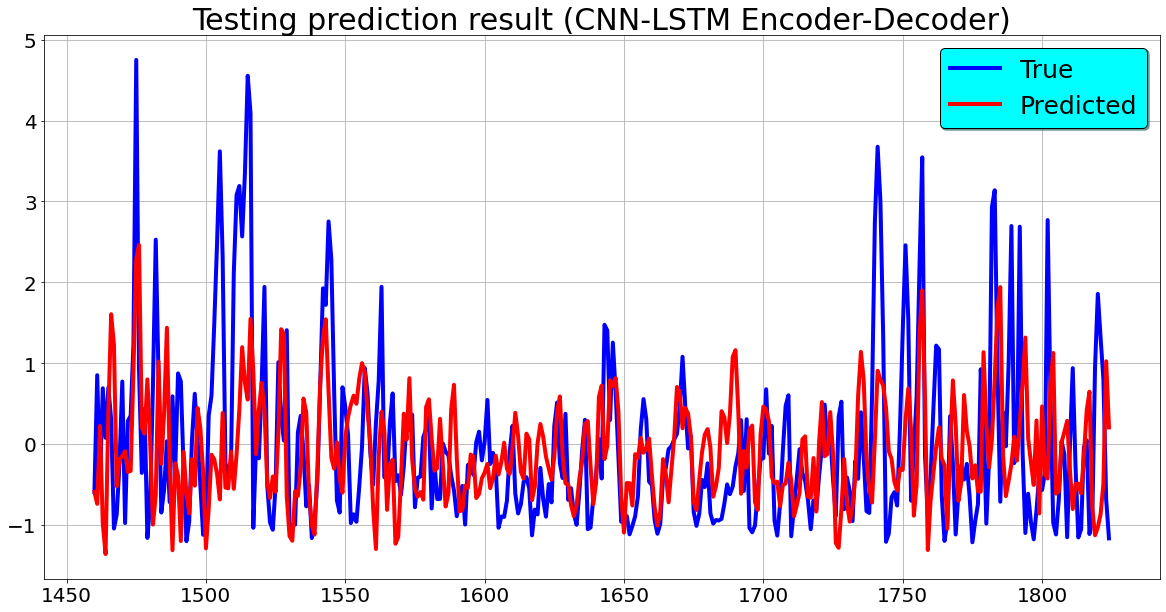

In [ ]:
test_predict_5 = model_5.predict(X_test)
test_predict_5 = test_predict_5.reshape(-1,1)
print('RMSE :', np.sqrt(mean_squared_error(y_test, test_predict_5)))

plt.figure(figsize = (20,10))
plt.grid(b=True, which='major', axis='both')
plt.title('Testing prediction result (CNN-LSTM Encoder-Decoder)', fontsize = 30)
plt.plot(stock_test.index, y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(stock_test.index, test_predict_5 ,linewidth = 4,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

## **14. Convolutional Neural Network**

In [ ]:
model_6 = Sequential()
model_6.add(Convolution1D(256, kernel_size=3, activation='relu', input_shape=(X_train[1,:].shape)))
model_6.add(Convolution1D(128, kernel_size=3, activation='relu'))
model_6.add(MaxPooling1D(pool_size=2))
model_6.add(Flatten())
model_6.add(Dense(1))
model_6.compile(loss='mse', optimizer='adam')
model_6_history = model_6.fit(X_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
14/14 [==============================] - 2s 117ms/step - loss: 0.9881
Epoch 2/100
14/14 [==============================] - 2s 114ms/step - loss: 0.8791
Epoch 3/100
14/14 [==============================] - 2s 117ms/step - loss: 0.7959
Epoch 4/100
14/14 [==============================] - 2s 116ms/step - loss: 0.7214
Epoch 5/100
14/14 [==============================] - 2s 114ms/step - loss: 0.6748
Epoch 6/100
14/14 [==============================] - 3s 189ms/step - loss: 0.6589
Epoch 7/100
14/14 [==============================] - 2s 163ms/step - loss: 0.6020
Epoch 8/100
14/14 [==============================] - 2s 115ms/step - loss: 0.5768
Epoch 9/100
14/14 [==============================] - 2s 116ms/step - loss: 0.5581
Epoch 10/100
14/14 [==============================] - 2s 114ms/step - loss: 0.5419
Epoch 11/100
14/14 [==============================] - 2s 114ms/step - loss: 0.5119
Epoch 12/100
14/14 [==============================] - 2s 113ms/step - loss: 0.4958
Epoch 13/100


12/12 [==============================] - 0s 10ms/step
RMSE : 1.2553067449310895


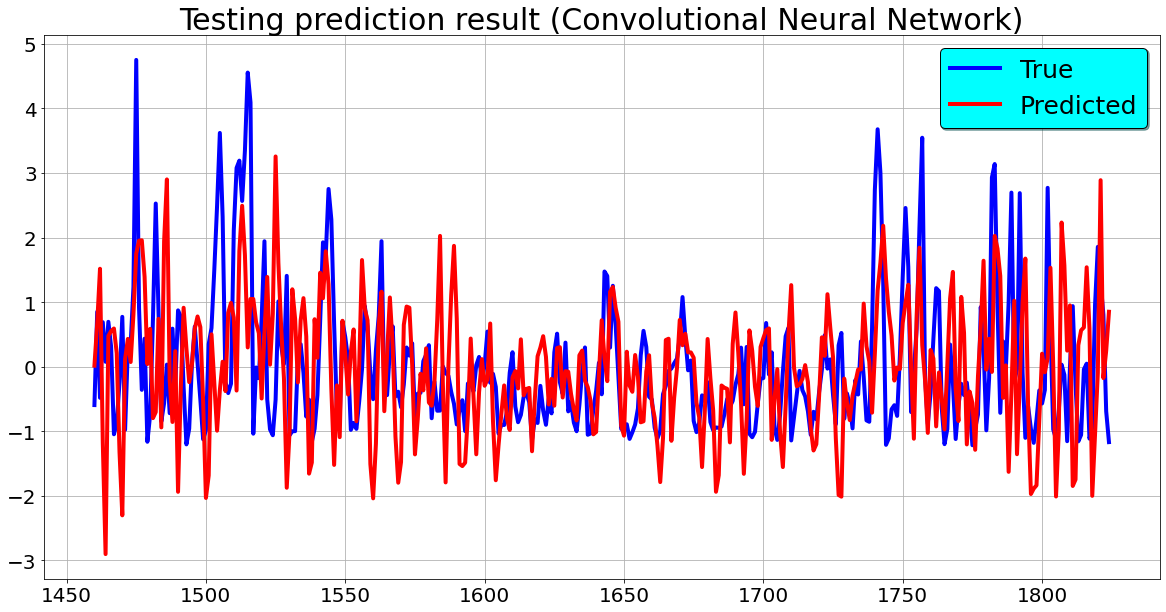

In [ ]:
test_predict_6 = model_6.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(y_test, test_predict_6)))

plt.figure(figsize = (20,10))
plt.grid(b=True, which='major', axis='both')
plt.title('Testing prediction result (Convolutional Neural Network)', fontsize = 30)
plt.plot(stock_test.index, y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(stock_test.index, test_predict_6, linewidth = 4, color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()